# Hidden State Activation : Ungraded Lecture Notebook

In this notebook you'll take another look at the hidden state activation function. It can be written in two different ways. 

I'll show you, step by step, how to implement each of them and then how to verify whether the results produced by each of them are same or not.

## Background

![vanilla rnn](vanilla_rnn.PNG)


This is the hidden state activation function for a vanilla RNN.

$h^{<t>}=g(W_{h}[h^{<t-1>},x^{<t>}] + b_h)$                                                    

Which is another way of writing this:         

$h^{<t>}=g(W_{hh}h^{<t-1>} \oplus W_{hx}x^{<t>} + b_h)$                                        

Where 

- $W_{h}$ in the first formula is denotes the *horizontal* concatenation of $W_{hh}$ and $W_{hx}$ from the second formula.

- $W_{h}$ in the first formula is then multiplied by $[h^{<t-1>},x^{<t>}]$, another concatenation of parameters from the second formula but this time in a different direction, i.e *vertical*!

Let us see what this means computationally.


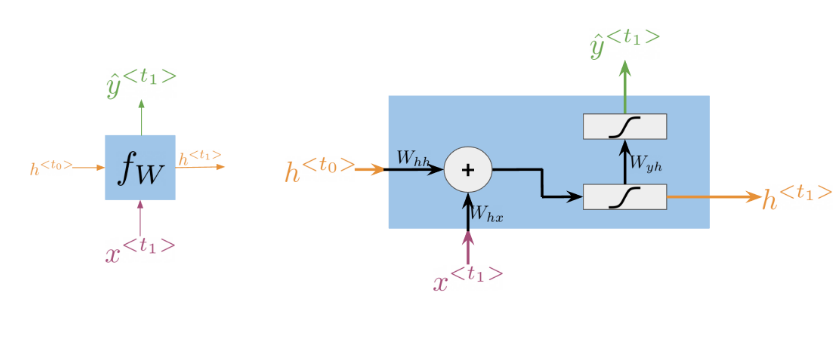

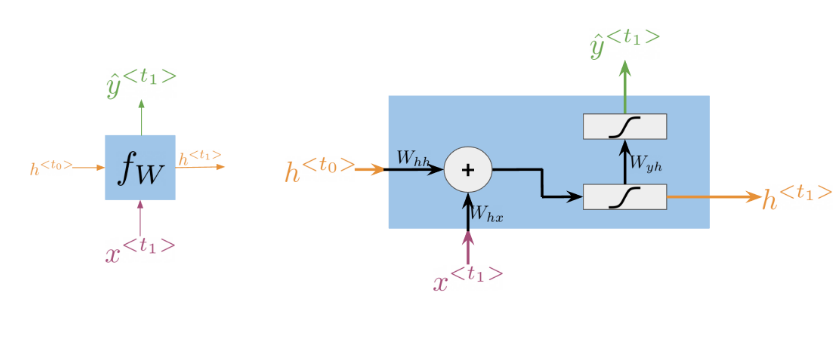

## Imports

In [1]:
import numpy as np

## Joining (Concatenation)

### Weights

A join along the vertical boundary is called a *horizontal concatenation* or *horizontal stack*. 

Visually, it looks like this:- $W_h = \left [ W_{hh} \ | \ W_{hx} \right ]$

I'll show you two different ways to achieve this using numpy.

__Note: The values used to populate the arrays, below, have been chosen to aid in visual illustration only. They are NOT what you'd expect to use building a model, which would typically be random variables instead.__

* Try using random initializations for the weight arrays.

In [2]:
# Create some dummy data

w_hh = np.full((3, 2), 1)  # illustration purposes only, returns an array of size 3x2 filled with all 1s
w_hx = np.full((3, 3), 9)  # illustration purposes only, returns an array of size 3x3 filled with all 9s


### START CODE HERE ###
# Try using some random initializations, though it will obfuscate the join. eg: uncomment these lines
# w_hh = np.random.standard_normal((3,2))
# w_hx = np.random.standard_normal((3,3))
### END CODE HERE ###

print("-- Data --\n")
print("w_hh :")
print(w_hh)
print("w_hh shape :", w_hh.shape, "\n")
print("w_hx :")
print(w_hx)
print("w_hx shape :", w_hx.shape, "\n")

# Joining the arrays
print("-- Joining --\n")
# Option 1: concatenate - horizontal
w_h1 = np.concatenate((w_hh, w_hx), axis=1)
print("option 1 : concatenate\n")
print("w_h :")
print(w_h1)
print("w_h shape :", w_h1.shape, "\n")

# Option 2: hstack
w_h2 = np.hstack((w_hh, w_hx))
print("option 2 : hstack\n")
print("w_h :")
print(w_h2)
print("w_h shape :", w_h2.shape)

-- Data --

w_hh :
[[1 1]
 [1 1]
 [1 1]]
w_hh shape : (3, 2) 

w_hx :
[[9 9 9]
 [9 9 9]
 [9 9 9]]
w_hx shape : (3, 3) 

-- Joining --

option 1 : concatenate

w_h :
[[1 1 9 9 9]
 [1 1 9 9 9]
 [1 1 9 9 9]]
w_h shape : (3, 5) 

option 2 : hstack

w_h :
[[1 1 9 9 9]
 [1 1 9 9 9]
 [1 1 9 9 9]]
w_h shape : (3, 5)


### Hidden State & Inputs
Joining along a horizontal boundary is called a vertical concatenation or vertical stack. Visually it looks like this:

$[h^{<t-1>},x^{<t>}] = \left[ \frac{h^{<t-1>}}{x^{<t>}} \right]$


I'll show you two different ways to achieve this using numpy.

*Try using random initializations for the hiddent state and input matrices.*


In [3]:
# Create some more dummy data
h_t_prev = np.full((2, 1), 1)  # illustration purposes only, returns an array of size 2x1 filled with all 1s
x_t = np.full((3, 1), 9)       # illustration purposes only, returns an array of size 3x1 filled with all 9s

# Try using some random initializations, though it will obfuscate the join. eg: uncomment these lines

### START CODE HERE ###
# h_t_prev = np.random.standard_normal((2,1))
# x_t = np.random.standard_normal((3,1))
### END CODE HERE ###

print("-- Data --\n")
print("h_t_prev :")
print(h_t_prev)
print("h_t_prev shape :", h_t_prev.shape, "\n")
print("x_t :")
print(x_t)
print("x_t shape :", x_t.shape, "\n")

# Joining the arrays
print("-- Joining --\n")

# Option 1: concatenate - vertical
ax_1 = np.concatenate(
    (h_t_prev, x_t), axis=0
)  # note the difference in axis parameter vs earlier
print("option 1 : concatenate\n")
print("ax_1 :")
print(ax_1)
print("ax_1 shape :", ax_1.shape, "\n")

# Option 2: vstack
ax_2 = np.vstack((h_t_prev, x_t))
print("option 2 : vstack\n")
print("ax_2 :")
print(ax_2)
print("ax_2 shape :", ax_2.shape)

-- Data --

h_t_prev :
[[1]
 [1]]
h_t_prev shape : (2, 1) 

x_t :
[[9]
 [9]
 [9]]
x_t shape : (3, 1) 

-- Joining --

option 1 : concatenate

ax_1 :
[[1]
 [1]
 [9]
 [9]
 [9]]
ax_1 shape : (5, 1) 

option 2 : vstack

ax_2 :
[[1]
 [1]
 [9]
 [9]
 [9]]
ax_2 shape : (5, 1)


## Verify Formulas
Now you know how to do the concatenations, horizontal and vertical, lets verify if the two formulas produce the same result.

__Formula 1:__ $h^{<t>}=g(W_{h}[h^{<t-1>},x^{<t>}] + b_h)$ 

__Formula 2:__ $h^{<t>}=g(W_{hh}h^{<t-1>} \oplus W_{hx}x^{<t>} + b_h)$


To prove:- __Formula 1__ $\Leftrightarrow$ __Formula 2__

We will ignore the bias term $b_h$ and the activation function $g(\ )$ because the transformation will be identical for each formula. So what we really want to compare is the result of the following parameters inside each formula:

$W_{h}[h^{<t-1>},x^{<t>}] \quad \Leftrightarrow \quad W_{hh}h^{<t-1>} \oplus W_{hx}x^{<t>} $

We'll see how to do this using matrix multiplication combined with the data and techniques (stacking/concatenating) from above.

* Try adding a sigmoid activation function and bias term to the checks for completeness.


In [4]:
# Data

w_hh = np.full((3, 2), 1)  # returns an array of size 3x2 filled with all 1s
w_hx = np.full((3, 3), 9)  # returns an array of size 3x3 filled with all 9s
h_t_prev = np.full((2, 1), 1)  # returns an array of size 2x1 filled with all 1s
x_t = np.full((3, 1), 9)       # returns an array of size 3x1 filled with all 9s


# If you want to randomize the values, uncomment the next 4 lines

# w_hh = np.random.standard_normal((3,2))
# w_hx = np.random.standard_normal((3,3))
# h_t_prev = np.random.standard_normal((2,1))
# x_t = np.random.standard_normal((3,1))

# Results
print("-- Results --")
# Formula 1
stack_1 = np.hstack((w_hh, w_hx))
stack_2 = np.vstack((h_t_prev, x_t))

print("\nFormula 1")
print("Term1:\n",stack_1)
print("Term2:\n",stack_2)
formula_1 = np.matmul(np.hstack((w_hh, w_hx)), np.vstack((h_t_prev, x_t)))
print("Output:")
print(formula_1)

# Formula 2
mul_1 = np.matmul(w_hh, h_t_prev)
mul_2 = np.matmul(w_hx, x_t)
print("\nFormula 2")
print("Term1:\n",mul_1)
print("Term2:\n",mul_2)

formula_2 = np.matmul(w_hh, h_t_prev) + np.matmul(w_hx, x_t)
print("\nOutput:")
print(formula_2, "\n")

# Verification 
# np.allclose - to check if two arrays are elementwise equal upto certain tolerance, here  
# https://numpy.org/doc/stable/reference/generated/numpy.allclose.html

print("-- Verify --")
print("Results are the same :", np.allclose(formula_1, formula_2))

### START CODE HERE ###
# # Try adding a sigmoid activation function and bias term as a final check
# # Activation
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# # Bias and check
# b = np.random.standard_normal((formula_1.shape[0],1))
# print("Formula 1 Output:\n",sigmoid(formula_1+b))
# print("Formula 2 Output:\n",sigmoid(formula_2+b))

# all_close = np.allclose(sigmoid(formula_1+b), sigmoid(formula_2+b))
# print("Results after activation are the same :",all_close)
### END CODE HERE ###

-- Results --

Formula 1
Term1:
 [[1 1 9 9 9]
 [1 1 9 9 9]
 [1 1 9 9 9]]
Term2:
 [[1]
 [1]
 [9]
 [9]
 [9]]
Output:
[[245]
 [245]
 [245]]

Formula 2
Term1:
 [[2]
 [2]
 [2]]
Term2:
 [[243]
 [243]
 [243]]

Output:
[[245]
 [245]
 [245]] 

-- Verify --
Results are the same : True


## Summary
That's it! We've verified that the two formulas produce the same results, and seen how to combine matrices vertically and horizontally to make that happen. We now have all the intuition needed to understand the math notation of RNNs.